# Exoplanet

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#Getting data
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set_context('paper', font_scale=2)

train=pd.read_csv('exoTrain.csv')
test=pd.read_csv('exoTest.csv')

In [3]:
print(f"The train shape is {train.shape}")
print(f"The test shape is {test.shape}")

The train shape is (5087, 3198)
The test shape is (570, 3198)


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 13.9 MB


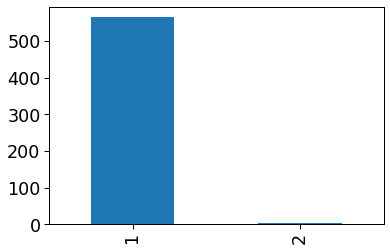

In [5]:
test['LABEL'].value_counts().plot(kind='bar')

This dataset is completly imbalanced!

# Balanced Bagging with several Classifiers

In [6]:
X_train=train.drop('LABEL',axis=1)
y_train=train['LABEL']

X_test=test.drop('LABEL',axis=1)
y_test=test['LABEL']

print(f"the shape of X_train is {X_train.shape}")
print(f"the shape of y_train is {y_train.shape}")
print(f"the shape of X_test is {X_test.shape}")
print(f"the shape of y_test is {y_test.shape}")

the shape of X_train is (5087, 3197)
the shape of y_train is (5087,)
the shape of X_test is (570, 3197)
the shape of y_test is (570,)


In [7]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import lightgbm as lgb
from ML_utils import *

clfs={'LR':LogisticRegression(),'SVC':SVC(),'KNN':KNeighborsClassifier(),
     'DT':DecisionTreeClassifier(),'RF':RandomForestClassifier(),'GB':GradientBoostingClassifier(),
     'LGBM':lgb.LGBMClassifier()}

acc={'LR':None,'SVC':None,'KNN': None,
     'DT':None,'RF':None,'GB':None,'LGBM':None}


cv_train=Cross_valid_clf(X_train.values,y_train.values,n_splits=5)

for key,value in clfs.items():
    print("-"*100)
    print(value)
    bbc = BalancedBaggingClassifier(base_estimator=value,sampling_strategy='auto',replacement=False,random_state=0)
    acc[key]=cv_train.score(bbc)


Using TensorFlow backend.


----------------------------------------------------------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/home/alefe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/alefe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

------------------------------

Fold 1 out of 5
Accuracy_score: 0.7239685658153242


/home/alefe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/alefe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

------------------------------

Fold 2 out of 5
Accuracy_score: 0.7996070726915521


/home/alefe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/alefe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

------------------------------

Fold 3 out of 5
Accuracy_score: 0.6607669616519174


/home/alefe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/alefe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

------------------------------

Fold 4 out of 5
Accuracy_score: 0.6922320550639135


/home/alefe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/alefe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

------------------------------

Fold 5 out of 5
Accuracy_score: 0.6194690265486725

 Overall Score:
Accuracy_score Mean: 0.699208736354276   Std: 0.060955295976984715
----------------------------------------------------------------------------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
------------------------------

Fold 1 out of 5
Accuracy_score: 0.9774066797642437
------------------------------

Fold 2 out of 5
Accuracy_score: 0.9852652259332023
------------------------------

Fold 3 out of 5
Accuracy_score: 0.9901671583087512
------------------------------

Fold 4 out of 5
Accuracy_score: 0.951819075712881
------------------------------

Fold 5 out of 5
Accuracy_score: 0.9931170108161259

 Overall Score:
Accuracy_score Mean: 0.9795550301070408   Std: 0.01

KeyboardInterrupt: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(list(acc.keys()), list(acc.values()))
plt.title('Training set')
plt.ylabel('Score')

SVC and KNN are the best classifiers!

In [ ]:
cv_test=Cross_valid_clf(X_test.values,y_test.values,n_splits=5)
cv_test.score(BalancedBaggingClassifier(base_estimator=SVC(),sampling_strategy='auto',replacement=False,random_state=0)
)

# Resampling with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

model = SVC()
params = {'C': np.linspace(0.1,1.2,12)}
smote = SMOTE(random_state=0)
X_res, y_res = smote.fit_sample(X_train, y_train)

x_train, x_val, y_train, y_val = train_test_split(X_res, y_res, test_size = 0.25, random_state = 0)

my_model, pred = algorithm_grid_search_cv(x_train, x_val, y_train, y_val, model=model,param_grid=params, cv=5, scoring_fit='accuracy')

print(f"The best score for my model is: {my_model.best_score_}")
print(f"The best params are: {my_model.best_params_}")